## TensorFlow Model Creation

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
current = current = os.getcwd()
parent = parent_dir = os.path.dirname(current)
#df = pd.read_csv(parent+"/data/joint_data_collection_8targets.csv", index_col="Unnamed: 0")

df_test = pd.read_csv(parent+"/data/validation/test_data.csv")

df_train = pd.read_csv(parent+"/data/train/training_data.csv")


print(f"Dataset Shape: {df_train.shape}")
print(f"Spalten: {df_train.columns.tolist()}")
print(f"Dataset Shape: {df_test.shape}")
print(f"Spalten: {df_test.columns.tolist()}")


Dataset Shape: (13912, 24)
Spalten: ['Engine type_In-line four, four-stroke', 'Engine type_In-line three, four-stroke', 'Engine type_Single cylinder, four-stroke', 'Engine type_Single cylinder, two-stroke', 'Engine type_Twin, four-stroke', 'Engine type_Twin, two-stroke', 'Engine type_Two cylinder boxer, four-stroke', 'Engine type_V2, four-stroke', 'Engine type_V4, four-stroke', 'Transmission type,final drive_Belt', 'Transmission type,final drive_Chain', 'Transmission type,final drive_Shaft drive (cardan)', 'Front brakes_Double disc', 'Front brakes_Dual disc', 'Front brakes_Expanding brake', 'Front brakes_Expanding brake (drum brake)', 'Front brakes_Single disc', 'Rear brakes_Expanding brake', 'Rear brakes_Expanding brake (drum brake)', 'Rear brakes_Single disc', 'Displacement ccm', 'Fuel capacity liters', 'Power HP', 'Category']
Dataset Shape: (3478, 24)
Spalten: ['Engine type_In-line four, four-stroke', 'Engine type_In-line three, four-stroke', 'Engine type_Single cylinder, four-strok

In [3]:
target_column = 'Category'  # <-- HIER ANPASSEN!

# Features (alle numerischen Spalten) und Target (Text) trennen


X_DFTest = df_test.drop(target_column, axis=1).values
y_text_DFTest = df_test[target_column].values

X_DFTrain = df_train.drop(target_column, axis=1).values
y_text_DFTrain = df_train[target_column].values



# Text-Target zu numerischen Labels konvertieren
label_encoder = LabelEncoder()
label_encoder.fit(y_text_DFTrain)
y_test = label_encoder.transform(y_text_DFTest)

y_train = label_encoder.transform(y_text_DFTrain)



X_train=X_DFTrain.copy()
X_test=X_DFTest.copy()



print(f"\nEncoded Target Shape: {y_test.shape}")
print(f"Label Mapping:")
for i, label in enumerate(label_encoder.classes_):
    count_train = np.sum(y_train == i)
    count_test = np.sum(y_test == i)
    print(f"  {i}: {label} (Train: {count_train}, Test: {count_test})")

num_classes = len(label_encoder.classes_)
print(num_classes)

# Train/Test Split
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, test_size=0.2, random_state=42, stratify=y
#)

print(f"\nTraining Samples: {len(X_train)}")
print(f"Test Samples: {len(X_test)}")





Encoded Target Shape: (3478,)
Label Mapping:
  0: Classic (Train: 2385, Test: 603)
  1: Cross / motocross (Train: 1533, Test: 381)
  2: Naked bike (Train: 3008, Test: 751)
  3: Scooter (Train: 2172, Test: 525)
  4: Sport (Train: 3006, Test: 778)
  5: Super motard (Train: 572, Test: 142)
  6: Touring (Train: 750, Test: 169)
  7: Unspecified category (Train: 486, Test: 129)
8

Training Samples: 13912
Test Samples: 3478


In [4]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='softmax', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(512, activation='softmax'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(512, activation='softmax'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(512, activation='softmax'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='softmax'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='softmax'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
       
    
    keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model Summary
print("\n" + "="*60)
print("MODEL ARCHITEKTUR")
print("="*60)
model.summary()



MODEL ARCHITEKTUR


e:\AIBAS HA\Repo\.venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        12,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │         4,104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,341,960 (5.12 MB)

 Trainable params: 1,335,816 (5.10 MB)

 Non-trainable params: 6,144 (24.00 KB)

In [5]:
def plotTrainingAndValidationPerformance(epochs, accuracy, val_accuracy, loss, val_loss):
    """
    This function creates and stores the (1) accuracy plot and (2) loss plot
    for training and validation performances and stores them as (a) png and (b) pdf file
    at the 'learningBase' of docker volume 'ai_system'.
    - loss: categorical_crossentropy
    Computes the crossentropy loss between the labels and predictions.
    This loss is the crossentropy metric class to be used when there are multiple label classes (2 or more). 
    Here it is assumed that labels are given as a `one_hot` representation. 
    For instance, when `labels` are [2, 0, 1], `y_true` = [[0, 0, 1], [1, 0, 0], [0, 1, 0]].
    remember: a lower validation loss indicates a better model.
    - accuracy: 
    This metric creates two local variables, `total` and `count` 
    that are used to compute the frequency with which `y_pred` matches `y_true`. 
    This frequency is ultimately returned as `binary accuracy`: an idempotent operation that simply divides `total` by `count`.
    remember: a higher validation accuracy indicates a better model.
    """
    
    # initialize figure
    plt.figure(figsize=(15, 15))
    
    # characterize accuracy plot
    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, label="Training Accuracy",  linewidth=0.5)
    plt.plot(epochs, val_accuracy, label="Validation Accuracy", linewidth=0.5)
    plt.legend(loc="lower right")
    plt.title("Training and Validation Accuracy")
    
    # characterize loss plot
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, label="Training Loss", linewidth=0.5)
    plt.plot(epochs, val_loss, label="Validation Loss", linewidth=0.5)
    plt.legend(loc="upper right")
    plt.title("Training and Validation Loss")
    
    # indicate performance by showing plot generated (having displays connected)
    #plt.show()
    
    # indicate performance by storing the plot as png and pdf file
    plt.savefig(current+'/nn_doc/TrainingPerformanceTry1.png')
    plt.savefig(current+'/nn_doc/TrainingPerformanceTry1.pdf')


TRAINING STARTED
Epoch 1/2000
87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2154 - loss: 2.0533 - val_accuracy: 0.2174 - val_loss: 2.0222
Epoch 2/2000
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2161 - loss: 1.9864 - val_accuracy: 0.2174 - val_loss: 1.9547
Epoch 3/2000
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2150 - loss: 1.9322 - val_accuracy: 0.2174 - val_loss: 1.9187
Epoch 4/2000
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2148 - loss: 1.9108 - val_accuracy: 0.2174 - val_loss: 1.9084
Epoch 5/2000
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2136 - loss: 1.9054 - val_accuracy: 0.2174 - val_loss: 1.9059
Epoch 6/2000
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2161 - loss: 1.9041 - val_accuracy: 0.2142 - val_loss: 1.9052
Epoch 7/2000
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.2136 - loss: 1.9035 - val_accuracy: 0.2142 - val_loss: 1.9050
Epoch 8/2000
87/87 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2161 - loss:

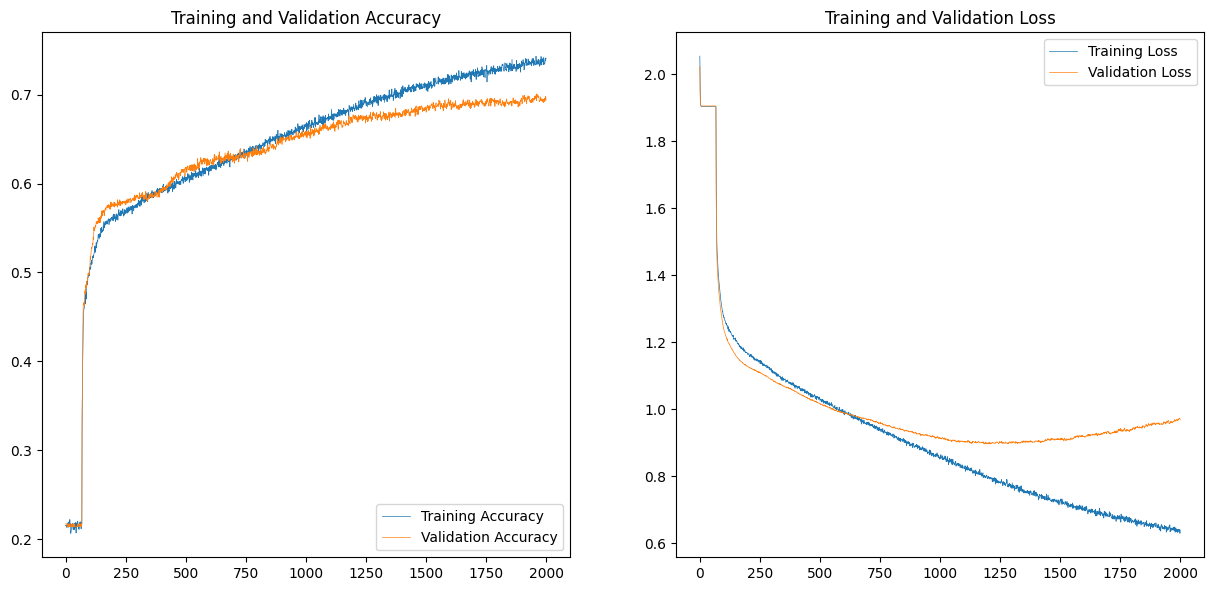

In [6]:
epochen=2000
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=100,
        restore_best_weights=True,
        verbose=1,
        min_delta=0.0001
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-7,
        verbose=1,
        min_delta=0.0001
    )
   
]

# Training starten
print(f"\n{'='*60}")
print(f"TRAINING STARTED")
print(f"{'='*60}")

start_time = datetime.now()

history = model.fit(
    X_train, y_train,
    epochs=epochen,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

#callbacks=callbacks,
end_time = datetime.now()
training_duration = (end_time - start_time).total_seconds()

# Training Metriken extrahieren
final_epoch = len(history.history['loss'])
final_train_loss = history.history['loss'][-1]
final_train_accuracy = history.history['accuracy'][-1]
final_val_loss = history.history['val_loss'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Best Epoch finden
best_epoch = np.argmin(history.history['val_loss']) + 1
best_val_loss = np.min(history.history['val_loss'])
best_val_accuracy = history.history['val_accuracy'][best_epoch - 1]

# Training Summary ausgeben
print(f"\n{'='*60}")
print(f"TRAINING SUMMARY")
print(f"{'='*60}")
print(f"Total Training Iterations (Epochs): {final_epoch}")
print(f"Training Duration: {training_duration:.2f} seconds ({training_duration/60:.2f} minutes)")
print(f"\nFinal Epoch ({final_epoch}):")
print(f"  - Training Loss: {final_train_loss:.6f}")
print(f"  - Training Accuracy: {final_train_accuracy:.6f} ({final_train_accuracy*100:.2f}%)")
print(f"  - Validation Loss: {final_val_loss:.6f}")
print(f"  - Validation Accuracy: {final_val_accuracy:.6f} ({final_val_accuracy*100:.2f}%)")
print(f"\nBest Epoch ({best_epoch}):")
print(f"  - Validation Loss: {best_val_loss:.6f}")
print(f"  - Validation Accuracy: {best_val_accuracy:.6f} ({best_val_accuracy*100:.2f}%)")

# Test Set Evaluation
print(f"\n{'='*60}")
print(f"TEST SET EVALUATION")
print(f"{'='*60}")

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.6f}")
print(f"Test Accuracy: {test_accuracy:.6f} ({test_accuracy*100:.2f}%)")

# Predictions
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# Zurück zu Text-Labels
y_test_text = label_encoder.inverse_transform(y_test)
y_pred_text = label_encoder.inverse_transform(y_pred)
plotTrainingAndValidationPerformance(range(epochen), history.history["accuracy"], history.history["val_accuracy"],history.history["loss"], history.history["val_loss"])


model.save(parent+"/code/models/bestmodelTry1.h5", save_format="h5")



    


CLASSIFICATION REPORT
                      precision    recall  f1-score   support

             Classic       0.70      0.72      0.71       603
   Cross / motocross       0.68      0.69      0.68       381
          Naked bike       0.68      0.58      0.63       751
             Scooter       0.93      0.94      0.94       525
               Sport       0.64      0.72      0.68       778
        Super motard       0.55      0.66      0.60       142
             Touring       0.66      0.55      0.60       169
Unspecified category       0.47      0.43      0.45       129

            accuracy                           0.70      3478
           macro avg       0.66      0.66      0.66      3478
        weighted avg       0.70      0.70      0.70      3478

e:\AIBAS HA\Repo
Classification Report gespeichert als: e:\AIBAS HA\Repo\code/nn_doc/NN_classification_reportTry1.txt
✓ Confusion Matrix gespeichert


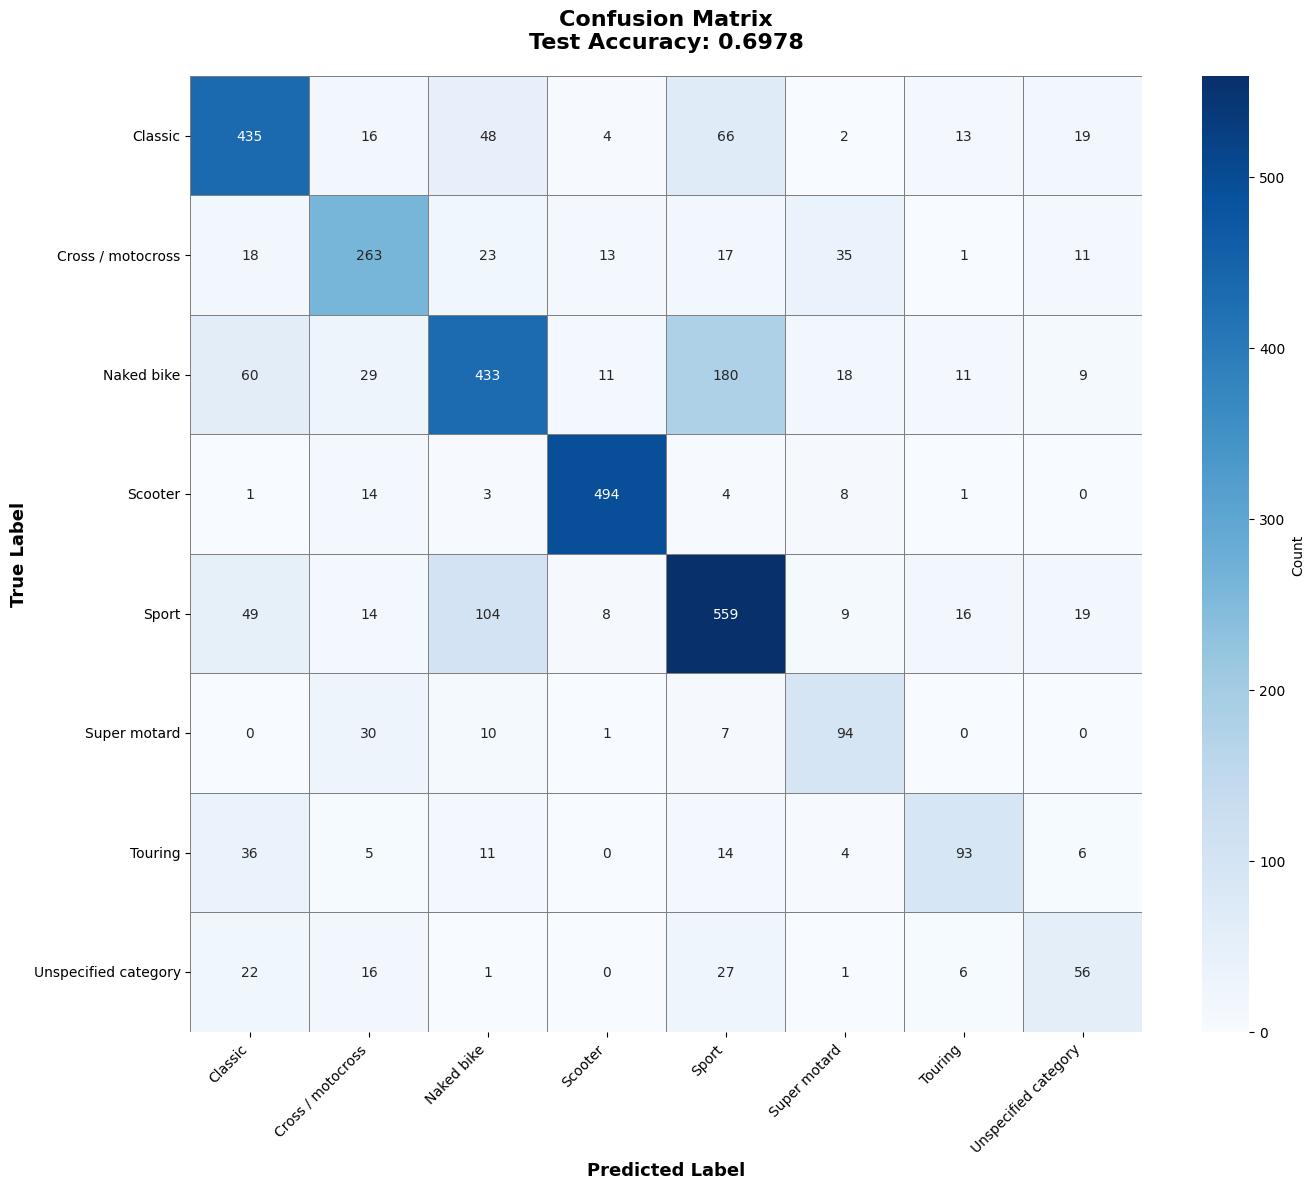

: 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

print("\n" + "="*60)
print("CLASSIFICATION REPORT")
print("="*60)
cr=classification_report(y_test_text, y_pred_text)
print(cr)
current = current = os.getcwd()
parent = parent_dir = os.path.dirname(current)
print(parent)
report_path=os.path.join(parent, "code/nn_doc/NN_classification_reportTry1.txt")
with open(report_path, 'w') as f:
    f.write("CLASSIFICATION REPORT\n")
    f.write("="*60 + "\n\n")
    f.write("\n")
    f.write(cr)
    f.write(f"\n\nTest Accuracy: {test_accuracy:.3f}\n")
print(f"Classification Report gespeichert als: {report_path}")
cm = confusion_matrix(y_test_text, y_pred_text)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'},
            linewidths=0.5,
            linecolor='gray')
plt.title(f'Confusion Matrix\nTest Accuracy: {test_accuracy:.4f}', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Predicted Label', fontsize=13, fontweight='bold')
plt.ylabel('True Label', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig(parent+'/code/nn_doc/confusion_matrixTry1.png', dpi=300, bbox_inches='tight')
print(f"✓ Confusion Matrix gespeichert")
plt.show()

